In [19]:
!pip install pandas
!pip install scikit-learn
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## 1. Linear Regression Model

In [33]:


class FrequencyOptimizer:
    def __init__(self, model_type='linear', freq_function='default'):
        """
        Initialize the FrequencyOptimizer class.
        
        :param model_type: Model type, either 'linear' or 'random_forest'
        :param freq_function: Frequency optimization function, 'default' or 'advanced'
        """
        self.model_type = model_type
        self.freq_function = freq_function
        self.model = None
    
    def generate_synthetic_data(self, num_samples=1000):
        """Generate synthetic data for training."""
        np.random.seed(42)
        
        input_frequency = np.random.uniform(50, 100, num_samples)  # Input frequency (50 to 100 messages/sec)
        cpu_usage = np.random.uniform(0, 100, num_samples)  # CPU usage (0-100%)
        ram_usage = np.random.uniform(0, 100, num_samples)  # RAM usage (0-100%)
        
        # Apply different frequency functions based on the chosen type
        if self.freq_function == 'advanced':
            output_frequency = input_frequency - (0.5 * cpu_usage + 0.3 * ram_usage + np.random.normal(0, 5, num_samples))
        else:
            output_frequency = input_frequency - (0.2 * cpu_usage + 0.2 * ram_usage + np.random.normal(0, 3, num_samples))
        
        output_frequency = np.clip(output_frequency, 0, 100)  # Ensure frequencies are within bounds [0, 100]
        
        # TODO: check dataframe structure according to the Prometheus data metrics
        data = pd.DataFrame({
            'input_frequency': input_frequency,
            'cpu_usage': cpu_usage,
            'ram_usage': ram_usage,
            'output_frequency': output_frequency
        })
        
        return data
    
    def prepare_data(self, data):
        X = data[['input_frequency', 'cpu_usage', 'ram_usage']]
        y = data['output_frequency']
        return X, y

    def train_model(self, X, y):
        """Train the selected model."""
        if self.model_type == 'linear':
            self.model = LinearRegression()
        elif self.model_type == 'random_forest':
            self.model = RandomForestRegressor(n_estimators=100, random_state=42)
        else:
            raise ValueError("Model type must be 'linear' or 'random_forest'")
        
        self.model.fit(X, y)
    
    def make_predictions(self, X):
        """Make predictions using the trained model."""
        if self.model is None:
            raise ValueError("Model must be trained before predictions can be made.")
        
        return self.model.predict(X)
    
    def evaluate_model(self, X_test, y_test):
        """Evaluate the model using MAE and RMSE."""
        y_pred = self.make_predictions(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        return mae, rmse
    
    def visualize_results(self, X_test, y_test):
        """Visualize the predictions vs actual values."""
        y_pred = self.make_predictions(X_test)
        
        plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
        plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
        plt.title('Predicted vs Actual Optimized Frequency Rate')
        plt.xlabel('Actual Optimized Frequency Rate')
        plt.ylabel('Predicted Optimized Frequency Rate')
        plt.show()

    def optimize_frequency(self, input_frequency, cpu_usage, ram_usage):
        """Predict optimized frequency for new input data."""
        new_data = np.array([[input_frequency, cpu_usage, ram_usage]])
        return self.model.predict(new_data)[0]
    
    def throughput_optimization(self, input_frequency, cpu_usage, ram_usage):
        """
        Throughput Optimization: Minimize the frequency change from the initial frequency.
        The goal is to keep the frequency as close to the initial frequency as possible
        while accounting for CPU and RAM usage.
        
        :param input_frequency: Initial input frequency (messages/sec)
        :param cpu_usage: Current CPU usage (%)
        :param ram_usage: Current RAM usage (%)
        
        :return: Optimized frequency
        """
        # We minimize the change from the input frequency by using the trained model.
        optimized_freq = self.optimize_frequency(input_frequency, cpu_usage, ram_usage)
        
        # The model may predict a frequency that differs from the initial input.
        # Throughput optimization tries to minimize this difference.
        optimized_freq = min(max(optimized_freq, input_frequency - 10), input_frequency + 10)  # Allow a +/- 10 tolerance.
        
        return optimized_freq
    
    def optimize_frequency_from_resources(self, input_frequency, cpu_usage, ram_usage):
        """
        Given CPU usage, RAM usage, and input frequency, predict the optimized frequency.
        
        :param optimizer: An instance of the FrequencyOptimizer class that has been trained.
        :param input_frequency: The initial frequency (messages/sec).
        :param cpu_usage: Current CPU usage in percentage.
        :param ram_usage: Current RAM usage in percentage.
        
        :return: The optimized frequency (messages/sec) based on the provided input.
        """
        # Ensure the model is trained before making predictions
        if self.model is None:
            raise ValueError("Model must be trained before predictions can be made.")
        
        # Use the trained model to predict the optimized frequency
        optimized_freq = self.optimize_frequency(input_frequency, cpu_usage, ram_usage)
        
        return optimized_freq


Mean Absolute Error (MAE): 5.14
Root Mean Squared Error (RMSE): 6.22


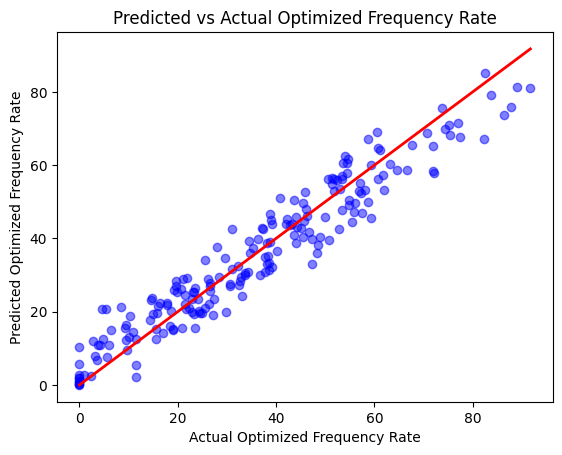

Optimized frequency rate for 80 messages/sec, 70% CPU, 60% RAM (Throughput Optimization): 70.00


C:\Users\mar.sessa\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [39]:

# Example usage with thoughput optimization method
if __name__ == "__main__":
    model_type = 'random_forest'  # 'linear' and 'random_forest'
    freq_function = 'advanced'  # default' and 'advanced'
    
    optimizer = FrequencyOptimizer(model_type=model_type, freq_function=freq_function)
    
    # Step 1: Generate synthetic data
    data = optimizer.generate_synthetic_data(num_samples=1000)
    
    # Step 2: Prepare data
    X, y = optimizer.prepare_data(data)

    
    # Step 3: Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Step 4: Train the model
    optimizer.train_model(X_train, y_train)
    
    # Step 5: Evaluate the model
    mae, rmse = optimizer.evaluate_model(X_test, y_test)
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    
    # Step 6: Visualize the results
    optimizer.visualize_results(X_test, y_test)
    
    # Step 7: Throughput Optimization example
    input_freq = 80  # msg/sec
    cpu = 70  # cpu usage
    ram = 60  # ram usage
    optimized_freq = optimizer.throughput_optimization(input_freq, cpu, ram)
    
    print(f"Optimized frequency rate for {input_freq} messages/sec, {cpu}% CPU, {ram}% RAM (Throughput Optimization): {optimized_freq:.2f}")

C:\Users\mar.sessa\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Mean Absolute Error (MAE): 3.25
Root Mean Squared Error (RMSE): 4.02


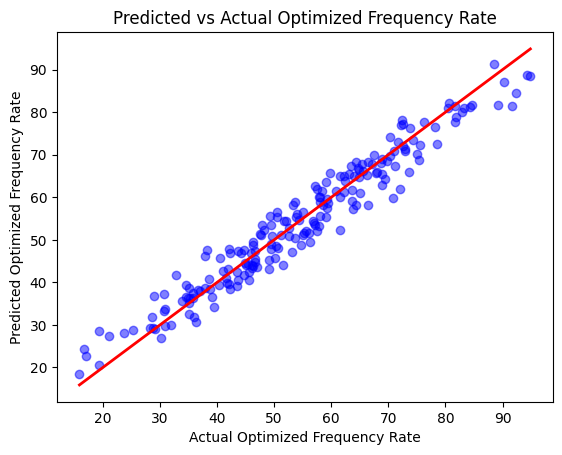

Optimized frequency for 80 messages/sec with 65% CPU and 50% RAM: 57.37 messages/sec


In [42]:
if __name__ == "__main__":
    optimizer = FrequencyOptimizer(model_type='random_forest', freq_function='default')
    
    # Step 1: Generate synthetic data and train the model (important step)
    data = optimizer.generate_synthetic_data(num_samples=1000)
    X, y = optimizer.prepare_data(data)
    
    # Step 2: Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    

    optimizer.train_model(X_train, y_train)
    
    # Step 3: Call the function to get the optimized frequency based on current resources
    input_frequency = 80  
    cpu_usage = 65  
    ram_usage = 50  # 
    
    optimized_frequency = optimizer.optimize_frequency_from_resources(input_frequency, cpu_usage, ram_usage)

    # Step 4: Evaluate the model
    mae, rmse = optimizer.evaluate_model(X_test, y_test)
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

    # Step 5: Visualize the results
    optimizer.visualize_results(X_test, y_test)
    
    print(f"Optimized frequency for {input_frequency} messages/sec with {cpu_usage}% CPU and {ram_usage}% RAM: {optimized_frequency:.2f} messages/sec")
